In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
#Downloaded make_blobs dataset

In [2]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
#Doing this we will make five clusters as we have given five centers, and we have two features

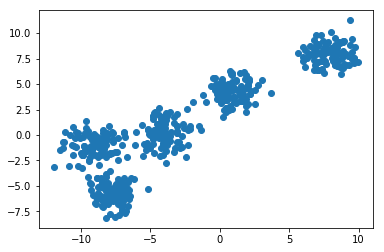

In [3]:
#Plotting we get five clusters
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
#We are not having a label or something because it is an unsupervised algorithm
k = 5

color  = ["red","green","yellow","blue","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1) #It will give us a random number between -10 to 10 for all the two features
    points = [] #We have no points for any cluster
    
    cluster = {
        'center':center, 
        'points':points,
        'color': color[i]
        }
    #Now we take k number of clusters with their colours and centers defined, but they will be updated according to the points that enter them
    clusters[i] = cluster
    

In [5]:
print(clusters)

{0: {'center': array([3.61706194, 7.88479961]), 'points': [], 'color': 'red'}, 1: {'center': array([ 6.00992319, -3.95096384]), 'points': [], 'color': 'green'}, 2: {'center': array([ 5.96952138, -0.60470588]), 'points': [], 'color': 'yellow'}, 3: {'center': array([-2.91733296, -1.31421424]), 'points': [], 'color': 'blue'}, 4: {'center': array([-0.89665848, -7.98871603]), 'points': [], 'color': 'orange'}}


In [6]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [14]:
# Assign every data point to one of the clusters
def assign(clusters): #E-Step
    for ix in range(X.shape[0]): #Will traverse all 500 rows
        dist = [] #will keep recording distances
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center']) #Compute distance between our point and all clusters
            dist.append(d) #Keep storing all distances

        current_cluster = np.argmin(dist)  #Record the cluster which has lowest distance from our point
        clusters[current_cluster]['points'].append(curr_x) #It is clear our point will belong to that cluster so we need to update points of that cluster

def update(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k): #All the five clusters are taken
        pts = np.array(clusters[kx]['points']) #Convert list of points to array
        
        if pts.shape[0]>0: #If a cluster has some number of points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u #The mean of all points is center
            clusters[kx]['points'] = [] #Clear the list 
                    
#We will keep taking E step then we will update and we will keep repeating the process   

def plot(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points']) #Get points for all the clusters
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color']) # Plot all the clusters with all colours
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center'] #Plotting the centers
        plt.scatter(uk[0],uk[1],color="black",marker="*")

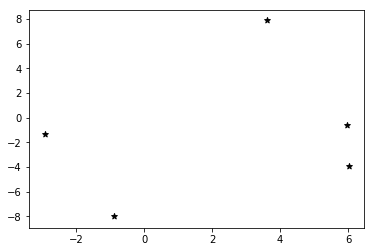

In [9]:
plot(clusters)

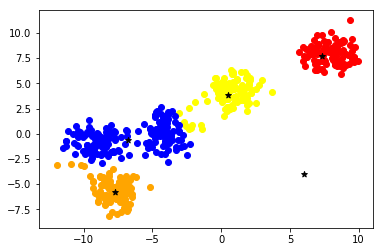

In [15]:
# Repeat this cell few times or put it inside a loop
assign(clusters)
plot(clusters)
update(clusters)

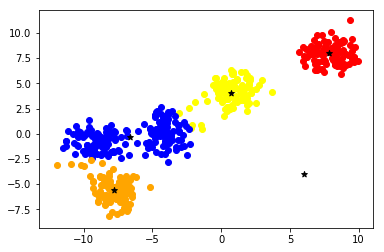

In [17]:
assign(clusters)

plot(clusters)
update(clusters)